# Uso das funções de determinação dos coeficientes polinomiais

Este notebook apresenta as formas de uso e teste das funções de determinação dos coeficientes polinomiais.
Testes automatizados simples são implementados para verificação das funcionalidades.

A célula de código abaixo realiza a importação das bibliotecas necessárias.

In [1]:
import marcelo_solver.coef_pol as mcp
import marcelo_solver.testes as mtt
import matplotlib.pyplot as plt # Para plotagem de gráficos
import numpy as np # Para métodos algébricos

O módulo `coef_pol` do pacote `marcelo_solver` possui as funções para determinação dos coeficientes polinomiais, o módulo `testes` do mesmo pacote implementa testes automatizados simples para as funções de `coef_pol`.

Para a função `cfcond_termica` que determina os coeficientes de condutividade térmica, a documentação pode ser consultada da seguinte forma:

In [2]:
help(mcp.cfcond_termica)

Help on function cfcond_termica in module marcelo_solver.coef_pol:

cfcond_termica(temp, unid='K', temps_inf_interval=[293.15, 1073.15], temps_sup_interval=[1073.15, 1788.15])
    Determina o coeficiente de condutividade térmica para temperaturas 
    ou vetores de temperaturas.
    
    Recebe:
    · temp(float ou ndarray) - temperaturas de cálculo. 
    · [unid(str)] - caractere 'K' ou 'C' para determinar a unidade de 
    temperatura 
    · [temps_inf_interval(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para os polinômios de condutividade 
    térmica.
    · [temps_sup_interval(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para os polinômios de condutividade 
    térmica. 
    
    Retorna:
    · ndarray ou float  de condutividades térmicas em W/m.K



A documentação de `testes` pode ser consultada de forma semelhante. No código abaixo a função de teste da condutividade térmica é consultada.

In [3]:
help(mtt.teste_condterm)

Help on function teste_condterm in module marcelo_solver.testes:

teste_condterm(teste)
    Realiza testes de funcionamento na função de determinação da função de 
    cálculo do coeficiente de condutividade térmica.
    
    1° - Teste de operação sobre vetor de temperaturas válidas:
    Recebe:
    teste = "VECTEMP-VAL"
        Este método cria um vetor no intervalo de temperaturas válido para
        para o modelo de coeficiente de condutividade térmica.
        Espera-se o cálculo correto dos valores de h expressos de forma gráfica.
    
    2° - Teste de operação sobre vetor de temperaturas com valores inválidos:
    teste = "VECTEMP-INVAL"
        Este método cria um vetor com valores fora do intervalo de 
        temperaturas válido para para o modelo de coeficiente de 
        condutividade térmica.
        Espera-se o levantamento de erro durante a tentativa de execuação.
    
    3° - Teste de operação sobre escalares randômicos válidos:
    teste = "RANDTEMP-VAL"
        Nes

O conjunto de funções disponíveis em cada módulo pode ser listado da seguinte forma:

In [4]:
print(dir(mcp))
print(dir(mtt))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calesp_vol', 'cfcond_termica', 'np']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calesp_vol', 'cfcond_termica', 'np', 'plt', 'teste_condterm']


## Uso da função `cfcond_termica`

Duas formas de uso são possíveis; na primeira delas escalares com valores de temperatura são passados para a função e um escalar com o valor do coeficiente é retornado.

In [5]:
mcp.cfcond_termica(300) # Temperatura 300K

-299646.0

Opcionalmente o usuário pode optar por passar o valor de temperatura em °C.

In [6]:
mcp.cfcond_termica(26.85, 'C') # Temperatura 26,85 °C

-299646.0

O intervalo de validade do modelo do coeficiente de condutividade térmica também pode ser modificado pelos parâmetros `temps_inf_interval`, e `temps_sup_interval`. Neste tipo de uso, a chamada à função fica na forma:

In [7]:
mcp.cfcond_termica(
    20, 'C', 
    temps_inf_interval = [14,30]
)

-286115.95192499994

In [8]:
mcp.cfcond_termica(
    13, 'C', 
    temps_inf_interval = [14,30]
)

ValueError: ERRO!
A temperatura 286.15 não é definida no intervalo detemperaturas do modelo:
[287.15 303.15]
[1073.15 1788.15]

In [12]:
mcp.cfcond_termica(
    1999, 'C', 
    temps_sup_interval = [900,2000]
)

27.3

A segunda forma de uso da função recebe como primeiro argumento um vetor de temperaturas em K ou °C, sendo a primeira unidade o parâmetro padr

## Teste da função `cfcond_termica`

### Teste de operação sobre um vetor de temperaturas válido

Note que nenhuma personalização é aplicada ao gráfico, ficando ao critério do usuário fazê-lo. 
Os objetos retornados `fig` e `ax` são nativos do [Maplotlib](https://matplotlib.org/), onde a documentação para os métodos de [Axis](https://matplotlib.org/stable/api/axis_api.html) e [Figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure) podem ser consultadas.

Testes na função cfcond_termica().


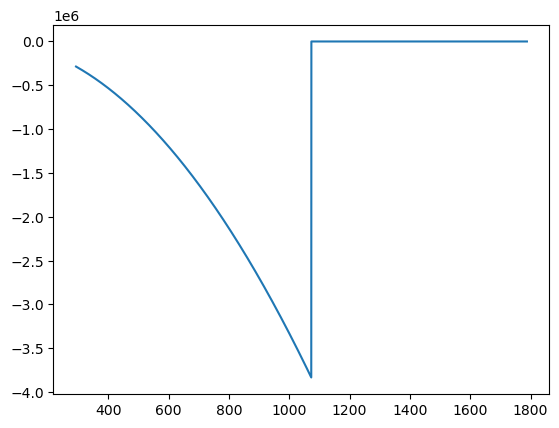

In [10]:
fig, ax = mtt.teste_condterm("VECTEMP-VAL")

### Teste de operação sobre um vetor de temperaturas inválido

Testes na função cfcond_termica().
Testando um vetor de temperaturas entre 273.15 e 2273.05


ValueError: x and y must have same first dimension, but have shapes (20000,) and (14951,)

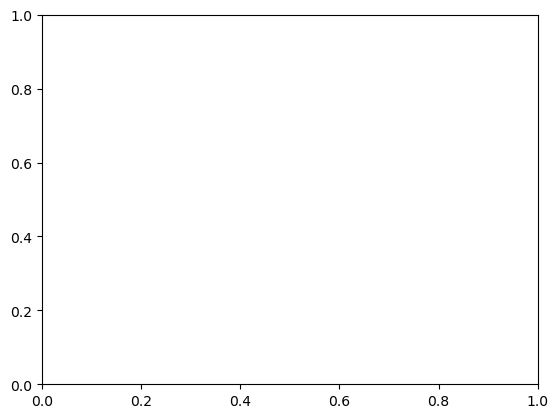

In [11]:
mtt.teste_condterm("VECTEMP-PARC-INVAL") #Deve retornar um erro